# Exercício 3: A)
Usando algoritmos implementados na questão 2, aproxime as funções abaixo. Compare os
resultados com as curvas exatas, para o caso dos itens b e c e apresente para cada caso a
curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médiocom o conjunto de validação. Faça uma análise comparativa sobre a convergência de cada um
dos algoritmos.<br>
a) a função lógica XOR<br>
b) f(x) = sen(pi*x)/(pi*x), 0 <= x <= 4


## Geração de dados

In [1]:
import numpy as np

# A) XOR
a_data_X = np.array([[0,0],[0,1],[1,0],[1,1]])
a_data_y = np.array([[0],[1],[1],[0]])

train_X, val_X, test_X = a_data_X, a_data_X, a_data_X
train_y, val_y, test_y = a_data_y, a_data_y, a_data_y

### Demonstração da geração de dados

In [2]:
print('{0} => {1}'.format(train_X[0], train_y[0]))
print('{0} => {1}'.format(train_X[1], train_y[1]))
print('{0} => {1}'.format(train_X[2], train_y[2]))
print('{0} => {1}'.format(train_X[3], train_y[3]))

[0 0] => [0]
[0 1] => [1]
[1 0] => [1]
[1 1] => [0]


## Rede Neural

Training the model: SGD
Actual: [0] Predicted: [[0.]]
Actual: [1] Predicted: [[1.]]
Actual: [1] Predicted: [[1.]]
Actual: [0] Predicted: [[0.]]
Accuracy: 1.0


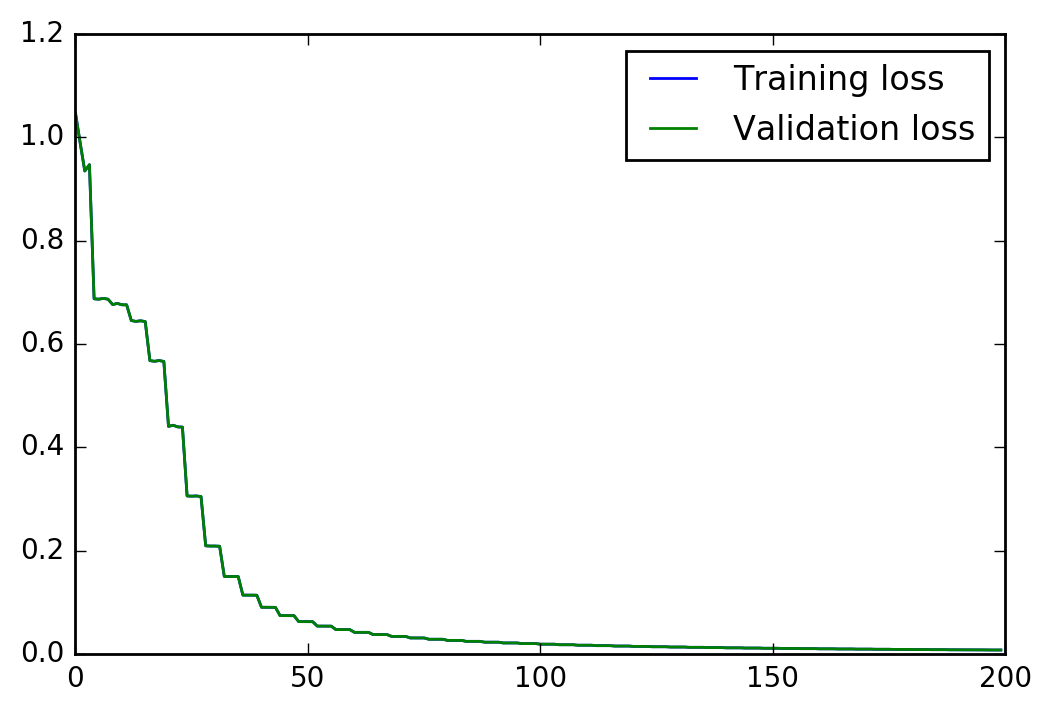

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.08
epoch = 5000
interval = 100
batch_size = 1
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = 2   # Number of input nodes
h_size = 4   # Number of hidden nodes
y_size = 1   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, y_size)))
b2 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
final_output = tf.nn.sigmoid(tf.add(tf.matmul(hidden_output, w2), b2), name='final_output')

# Cost Function
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))
loss = tf.reduce_mean(( (y * tf.log(final_output)) + ((1 - y) * tf.log(1.0 - final_output)) ) * -1)
# Optimizer
# GD
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Momentum GD
#optimizer = tf.train.MomentumOptimizer(learning_rate, 0.5).minimize(loss)

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model: SGD')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y})
        
        if e % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y})
            val_loss   = sess.run(loss, feed_dict={X: val_X, y: val_y})
            """print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss , '|',
                  'Validation Loss:', val_loss)"""
            losses['train'].append(train_loss)
            losses['validation'].append(val_loss)

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

graph = tf.get_default_graph()
X = graph.get_tensor_by_name("X:0")
final_output = graph.get_tensor_by_name("final_output:0")

success = 0
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]]})
    if test_y[i] == np.round(predicted):
        success += 1
    print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

Training the model: Por lote
Actual: [0] Predicted: [[0.]]
Actual: [1] Predicted: [[1.]]
Actual: [1] Predicted: [[1.]]
Actual: [0] Predicted: [[0.]]
Accuracy: 1.0


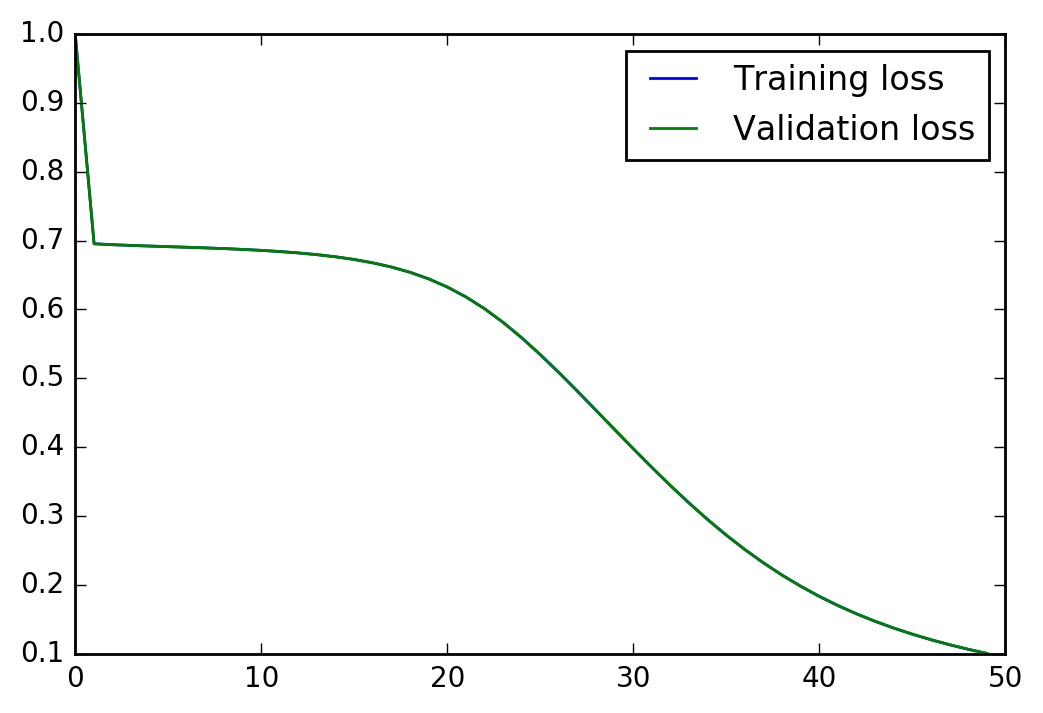

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.08
epoch = 5000
interval = 100
batch_size = 4
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = 2   # Number of input nodes
h_size = 4   # Number of hidden nodes
y_size = 1   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, y_size)))
b2 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
final_output = tf.nn.sigmoid(tf.add(tf.matmul(hidden_output, w2), b2), name='final_output')

# Cost Function
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))
loss = tf.reduce_mean(( (y * tf.log(final_output)) + ((1 - y) * tf.log(1.0 - final_output)) ) * -1)
# Optimizer
# GD
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Momentum GD
#optimizer = tf.train.MomentumOptimizer(learning_rate, 0.5).minimize(loss)

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model: Por lote')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y})
        
        if e % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y})
            val_loss   = sess.run(loss, feed_dict={X: val_X, y: val_y})
            """print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss , '|',
                  'Validation Loss:', val_loss)"""
            losses['train'].append(train_loss)
            losses['validation'].append(val_loss)

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

graph = tf.get_default_graph()
X = graph.get_tensor_by_name("X:0")
final_output = graph.get_tensor_by_name("final_output:0")

success = 0
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]]})
    if test_y[i] == np.round(predicted):
        success += 1
    print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

Training the model: Por lote com momentum
Actual: [0] Predicted: [[0.]]
Actual: [1] Predicted: [[1.]]
Actual: [1] Predicted: [[1.]]
Actual: [0] Predicted: [[0.]]
Accuracy: 1.0


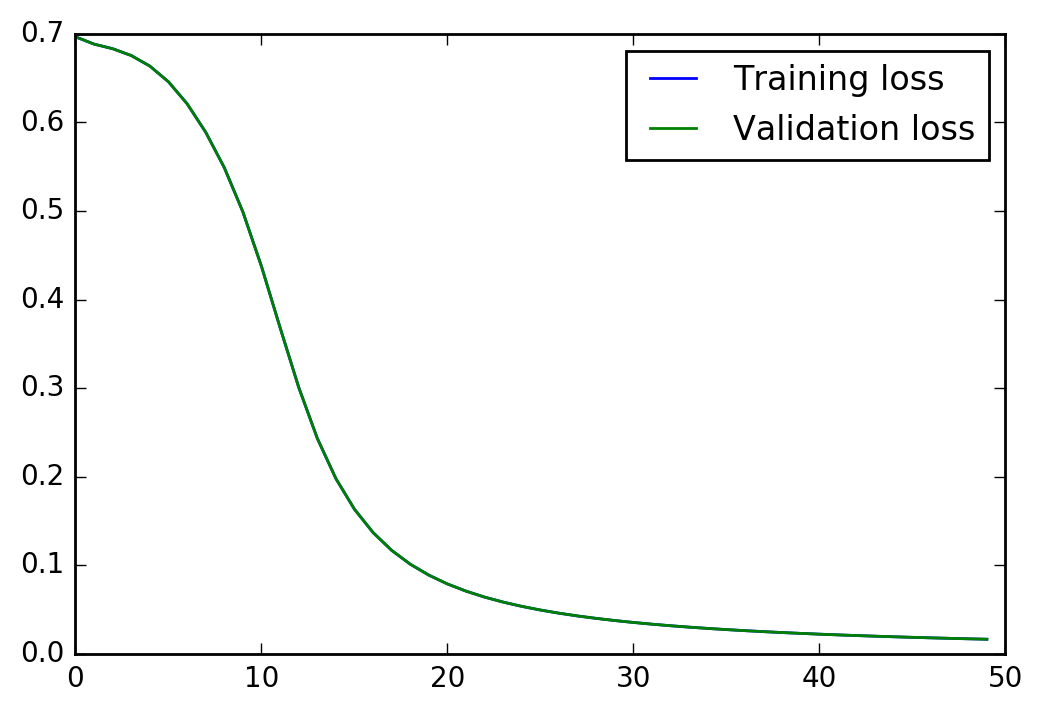

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.08
epoch = 5000
interval = 100
batch_size = 4
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = 2   # Number of input nodes
h_size = 4   # Number of hidden nodes
y_size = 1   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, y_size)))
b2 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
final_output = tf.nn.sigmoid(tf.add(tf.matmul(hidden_output, w2), b2), name='final_output')

# Cost Function
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))
loss = tf.reduce_mean(( (y * tf.log(final_output)) + ((1 - y) * tf.log(1.0 - final_output)) ) * -1)
# Optimizer
# GD
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Momentum GD
optimizer = tf.train.MomentumOptimizer(learning_rate, 0.5).minimize(loss)

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model: Por lote com momentum')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y})
        
        if e % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y})
            val_loss   = sess.run(loss, feed_dict={X: val_X, y: val_y})
            """print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss , '|',
                  'Validation Loss:', val_loss)"""
            losses['train'].append(train_loss)
            losses['validation'].append(val_loss)

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

graph = tf.get_default_graph()
X = graph.get_tensor_by_name("X:0")
final_output = graph.get_tensor_by_name("final_output:0")

success = 0
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]]})
    if test_y[i] == np.round(predicted):
        success += 1
    print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))